In [1]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

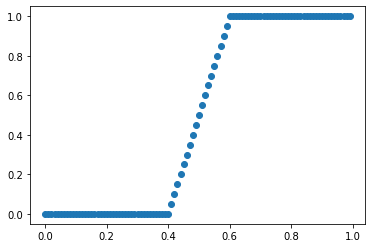

In [36]:
x_points = []
y_points = []

for i in range(100):
    
    # We need to normalize X values to ensure that our obj function doesn't blow up in value 
    x_points.append(float(i)/100)

    if i < 40:
        y_points.append(0)
    elif i >= 60:
        y_points.append(1)
    else:
        y_points.append((1/20)*(i - 60) + 1)

plt.plot(x_points, y_points, "o")
plt.show()

In [37]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)

In [38]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [39]:
torch.exp(1.0*X_train + 1.0), 1.0*X_train + 1.0

(tensor([3.0344, 4.3492, 6.3598, 3.5966, 6.8895, 2.8577, 5.2593, 5.2070, 3.8574,
         3.1899, 4.4371, 3.8190, 2.9154, 7.0287, 3.5609, 3.2871, 6.1104, 3.4903,
         5.0531, 3.0957, 3.4556, 2.8011, 3.2220, 3.9749, 2.9447, 5.9299, 2.8864,
         5.1552, 3.8962, 6.6194, 4.7588, 7.3155, 4.6646, 4.1787, 4.4817, 5.3122,
         4.3060, 5.3656, 5.0028, 7.1707, 5.9895, 4.0960, 4.8550, 4.3929, 7.2427,
         4.8066, 5.7546, 3.7434, 6.9588, 4.9037, 5.1039, 6.2965, 3.9354, 3.6328,
         2.7456, 4.5722, 3.3535, 2.7732, 3.4212, 6.4883, 6.7531, 5.6973, 6.4237,
         6.1719, 3.3201, 4.9530, 5.5290, 3.1268, 6.8210, 4.5267]),
 tensor([1.1100, 1.4700, 1.8500, 1.2800, 1.9300, 1.0500, 1.6600, 1.6500, 1.3500,
         1.1600, 1.4900, 1.3400, 1.0700, 1.9500, 1.2700, 1.1900, 1.8100, 1.2500,
         1.6200, 1.1300, 1.2400, 1.0300, 1.1700, 1.3800, 1.0800, 1.7800, 1.0600,
         1.6400, 1.3600, 1.8900, 1.5600, 1.9900, 1.5400, 1.4300, 1.5000, 1.6700,
         1.4600, 1.6800, 1.6100, 1.9700, 1

In [62]:
# Helper function for finding the optimal b
def grad_descent(y, b, lr=1):  # Learning rate for Log. Reg. needed to be larger than linear regression
    grad = torch.autograd.grad(y, b)[0]

    return b - lr * grad, grad

# Helper function for representing the objective function
def obj_fun(b):
    
    # h is the probability parameter here
    h = 1/(1 + torch.exp((b[1]*X_train + b[0])))

    # We want to leverage h in the appropriate loss function for log. reg.
    return -1*torch.sum(y_train*torch.log(h) + (1-y_train)*torch.log(1 - h))/len(X_train)

# Initial guess for b
b = torch.tensor([1.0, 1.0], requires_grad=True)

# Optimization loop
for i in range(1000):  # Increased the number of iterations for better convergence
    loss = obj_fun(b)
    print(F"loss = {loss}")
    b, grad = grad_descent(loss, b)
    print(f"Iteration {i+1}: b = {b}, Loss = {loss.item()}")
    print(grad)

# Final result
print("Optimal b:", b[1].item(), "Optimal intercept:", b[0].item())

loss = 1.1156245470046997
Iteration 1: b = tensor([0.6632, 0.6944], grad_fn=<SubBackward0>), Loss = 1.1156245470046997
tensor([0.3368, 0.3056])
loss = 0.9282042384147644
Iteration 2: b = tensor([0.4088, 0.4317], grad_fn=<SubBackward0>), Loss = 0.9282042384147644
tensor([0.2543, 0.2627])
loss = 0.8101170063018799
Iteration 3: b = tensor([0.2353, 0.2131], grad_fn=<SubBackward0>), Loss = 0.8101170063018799
tensor([0.1736, 0.2186])
loss = 0.7419558763504028
Iteration 4: b = tensor([0.1282, 0.0321], grad_fn=<SubBackward0>), Loss = 0.7419558763504028
tensor([0.1071, 0.1810])
loss = 0.7028899192810059
Iteration 5: b = tensor([ 0.0700, -0.1205], grad_fn=<SubBackward0>), Loss = 0.7028899192810059
tensor([0.0582, 0.1526])
loss = 0.6787511110305786
Iteration 6: b = tensor([ 0.0457, -0.2528], grad_fn=<SubBackward0>), Loss = 0.6787511110305786
tensor([0.0244, 0.1323])
loss = 0.6618901491165161
Iteration 7: b = tensor([ 0.0441, -0.3707], grad_fn=<SubBackward0>), Loss = 0.6618901491165161
tensor([0.0

In [63]:
# Define the regression function

def regression_line(b, x_values):

    y_pred = []

    for x in x_values:
        y_pred.append(1/(1 + torch.exp(float(b[0]) + float(b[1])*x)))

    return y_pred

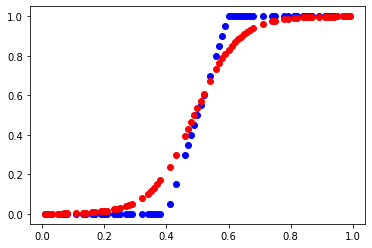

In [64]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

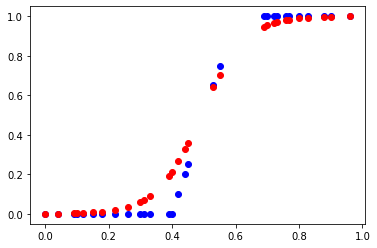

In [65]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

In [66]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [67]:
MSE(y_pred, y_test)

tensor(0.0056)

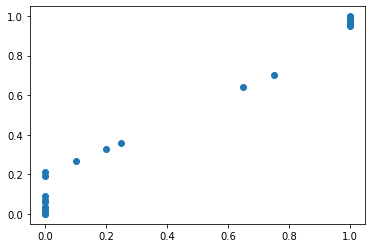

In [68]:
plt.plot(y_test, y_pred, "o")